# __Import Packages__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
sns.set_style('darkgrid')

# __Data Overview__

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
raw_data = pd.read_csv('../data/housing.csv')

In [3]:
raw_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
raw_data.shape

(20640, 10)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
raw_data.describe().style.background_gradient('plasma')

# __Data Preperation__

In [7]:
data = raw_data.copy(deep=True)

In [8]:
data.columns = data.columns.str.title()

In [9]:
data['Ocean_Proximity'] = data['Ocean_Proximity'].str.title()

In [10]:
data.head()

Longitude  Latitude  Housing_Median_Age  Total_Rooms  Total_Bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   Population  Households  Median_Income  Median_House_Value Ocean_Proximity  
0       322.0       126.0         8.3252            452600.0        Near Bay  
1      2401.0      1138.0         8.3014            358500.0        Near Bay  
2       496.0       177.0         7.2574            352100.0        Near Bay  
3       558.0       219.0         5.6431            341300.0        Near Bay  
4       565.0       259.0         3.8462            342200.0        Near Bay

In [11]:
data['Longitude'].dtypes

dtype('float64')

In [12]:
for column in data.iloc[:, :-1].columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].astype(dtype='float32')

In [13]:
features = data.drop(columns=['Median_House_Value'])
target = data[['Median_House_Value']]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude           20640 non-null  float32
 1   Latitude            20640 non-null  float32
 2   Housing_Median_Age  20640 non-null  float32
 3   Total_Rooms         20640 non-null  float32
 4   Total_Bedrooms      20433 non-null  float32
 5   Population          20640 non-null  float32
 6   Households          20640 non-null  float32
 7   Median_Income       20640 non-null  float32
 8   Median_House_Value  20640 non-null  float32
 9   Ocean_Proximity     20640 non-null  object 
dtypes: float32(9), object(1)
memory usage: 887.0+ KB


In [15]:
data.head()

Longitude   Latitude  Housing_Median_Age  Total_Rooms  Total_Bedrooms  \
0 -122.230003  37.880001                41.0        880.0           129.0   
1 -122.220001  37.860001                21.0       7099.0          1106.0   
2 -122.239998  37.849998                52.0       1467.0           190.0   
3 -122.250000  37.849998                52.0       1274.0           235.0   
4 -122.250000  37.849998                52.0       1627.0           280.0   

   Population  Households  Median_Income  Median_House_Value Ocean_Proximity  
0       322.0       126.0         8.3252            452600.0        Near Bay  
1      2401.0      1138.0         8.3014            358500.0        Near Bay  
2       496.0       177.0         7.2574            352100.0        Near Bay  
3       558.0       219.0         5.6431            341300.0        Near Bay  
4       565.0       259.0         3.8462            342200.0        Near Bay

# __Data Prepocessing__

In [16]:
feature_numcols = data.iloc[:, :-2].select_dtypes(include=np.number).columns
feature_objcols = data[['Ocean_Proximity']]

## __Handling Missing Values__

In [17]:
# Initializing the lists to store the column names, missing values, and percentage of missing values
name = []  # column names list
value = []  # total missing values list
percentage = []  # missing percentage list

# Looping through each column in the data
for column in data.columns:

    # Check if the column has any missing values
    if data[column].isnull().any():

        # If yes, then append the column name to 'name' list
        name.append(column)

        # Append the number of missing values to 'value' list
        value.append(data[column].isnull().sum())

        # Append the percentage of missing values to 'percentage' list
        percentage.append(
            f'{round(data[column].isna().sum()/data.shape[0]*100, 4)}%')

    # If there are no missing values in the entire dataset
    elif data.isnull().any() is False:

        # Print a message indicating that there are no missing values in the dataset
        print("There is no missing values present in this dataset")

# Creating a dataframe with the lists 'name', 'value', and 'percentage'
missing_data = pd.DataFrame(
    {
        'Name': name, 
        'Value': value, 
        'Percentage': percentage
    }
)

In [18]:
missing_data

Name  Value Percentage
0  Total_Bedrooms    207    1.0029%

In [19]:
cols_with_nan = data.columns[data.isnull().any()]
data.columns.difference(cols_with_nan).tolist()

['Households',
 'Housing_Median_Age',
 'Latitude',
 'Longitude',
 'Median_House_Value',
 'Median_Income',
 'Ocean_Proximity',
 'Population',
 'Total_Rooms']

In [20]:
from sklearn.impute import KNNImputer

def impute_knn(df):
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
    return df_imputed
    

In [21]:
data_missed_imputed = impute_knn(data[feature_numcols])
data2 = pd.concat([data_missed_imputed, data['Ocean_Proximity'], data['Median_House_Value']], axis=1)
data2

Longitude   Latitude  Housing_Median_Age  Total_Rooms  Total_Bedrooms  \
0     -122.230003  37.880001                41.0        880.0           129.0   
1     -122.220001  37.860001                21.0       7099.0          1106.0   
2     -122.239998  37.849998                52.0       1467.0           190.0   
3     -122.250000  37.849998                52.0       1274.0           235.0   
4     -122.250000  37.849998                52.0       1627.0           280.0   
...           ...        ...                 ...          ...             ...   
20635 -121.089996  39.480000                25.0       1665.0           374.0   
20636 -121.209999  39.490002                18.0        697.0           150.0   
20637 -121.220001  39.430000                17.0       2254.0           485.0   
20638 -121.320000  39.430000                18.0       1860.0           409.0   
20639 -121.239998  39.369999                16.0       2785.0           616.0   

       Population  Households  Median_Income Ocean_Proximity  \
0           322.0       126.0         8.3252        Near Bay   
1          2401.0      1138.0         8.3014        Near Bay   
2           496.0       177.0         7.2574        Near Bay   
3           558.0       219.0         5.6431        Near Bay   
4           565.0       259.0         3.8462        Near Bay   
...           ...         ...            ...             ...   
20635       845.0       330.0         1.5603          Inland   
20636       356.0       114.0         2.5568          Inland   
20637      1007.0       433.0         1.7000          Inland   
20638       741.0       349.0         1.8672          Inland   
20639      1387.0       530.0         2.3886          Inland   

       Median_House_Value  
0                452600.0  
1                358500.0  
2                352100.0  
3                341300.0  
4                342200.0  
...                   ...  
20635             78100.0  
20636             77100.0  
20637             92300.0  
20638             84700.0  
20639             89400.0  

[20640 rows x 10 columns]

## __Univariate Analysis__

### Categorical Feature Distribution

In [22]:
ocean_values = data2["Ocean_Proximity"].value_counts()
ocean_values

<1H Ocean     9136
Inland        6551
Near Ocean    2658
Near Bay      2290
Island           5
Name: Ocean_Proximity, dtype: int64

In [23]:
data.groupby(by='Ocean_Proximity').mean()

Longitude   Latitude  Housing_Median_Age  Total_Rooms  \
Ocean_Proximity                                                           
<1H Ocean       -118.847771  34.560577           29.279224  2628.343750   
Inland          -119.732986  36.731827           24.271868  2717.742676   
Island          -118.354004  33.358002           42.400002  1574.599976   
Near Bay        -122.260696  37.801056           37.730129  2493.589600   
Near Ocean      -119.332558  34.738441           29.347254  2583.700928   

                 Total_Bedrooms   Population  Households  Median_Income  \
Ocean_Proximity                                                           
<1H Ocean            546.539185  1520.290527  517.744995       4.230682   
Inland               533.881592  1391.046265  477.447571       3.208996   
Island               420.399994   668.000000  276.600006       2.744420   
Near Bay             514.182800  1230.317505  488.616150       4.172885   
Near Ocean           538.615662  1354.008667  501.244537       4.005785   

                 Median_House_Value  
Ocean_Proximity                      
<1H Ocean             240084.281250  
Inland                124805.390625  
Island                380440.000000  
Near Bay              259212.328125  
Near Ocean            249433.984375

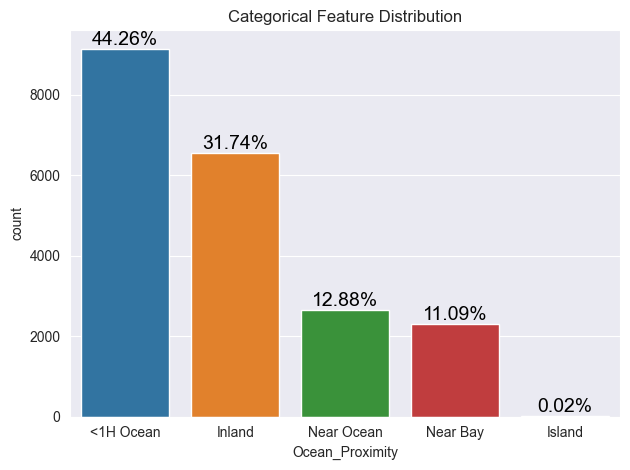

In [24]:
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

sns.countplot(
    data=data2, 
    x='Ocean_Proximity', 
    order=ocean_values.index
)
for i in range(ocean_values.shape[0]):
    count = ocean_values[i] 
    strt=f'{round(100*count / data2.shape[0], 2)}%' 
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14)


plt.title('Categorical Feature Distribution')
plt.tight_layout()
plt.show()

### __Continuos Feature Distribution__

In [25]:
feature_numcols

Index(['Longitude', 'Latitude', 'Housing_Median_Age', 'Total_Rooms',
       'Total_Bedrooms', 'Population', 'Households', 'Median_Income'],
      dtype='object')

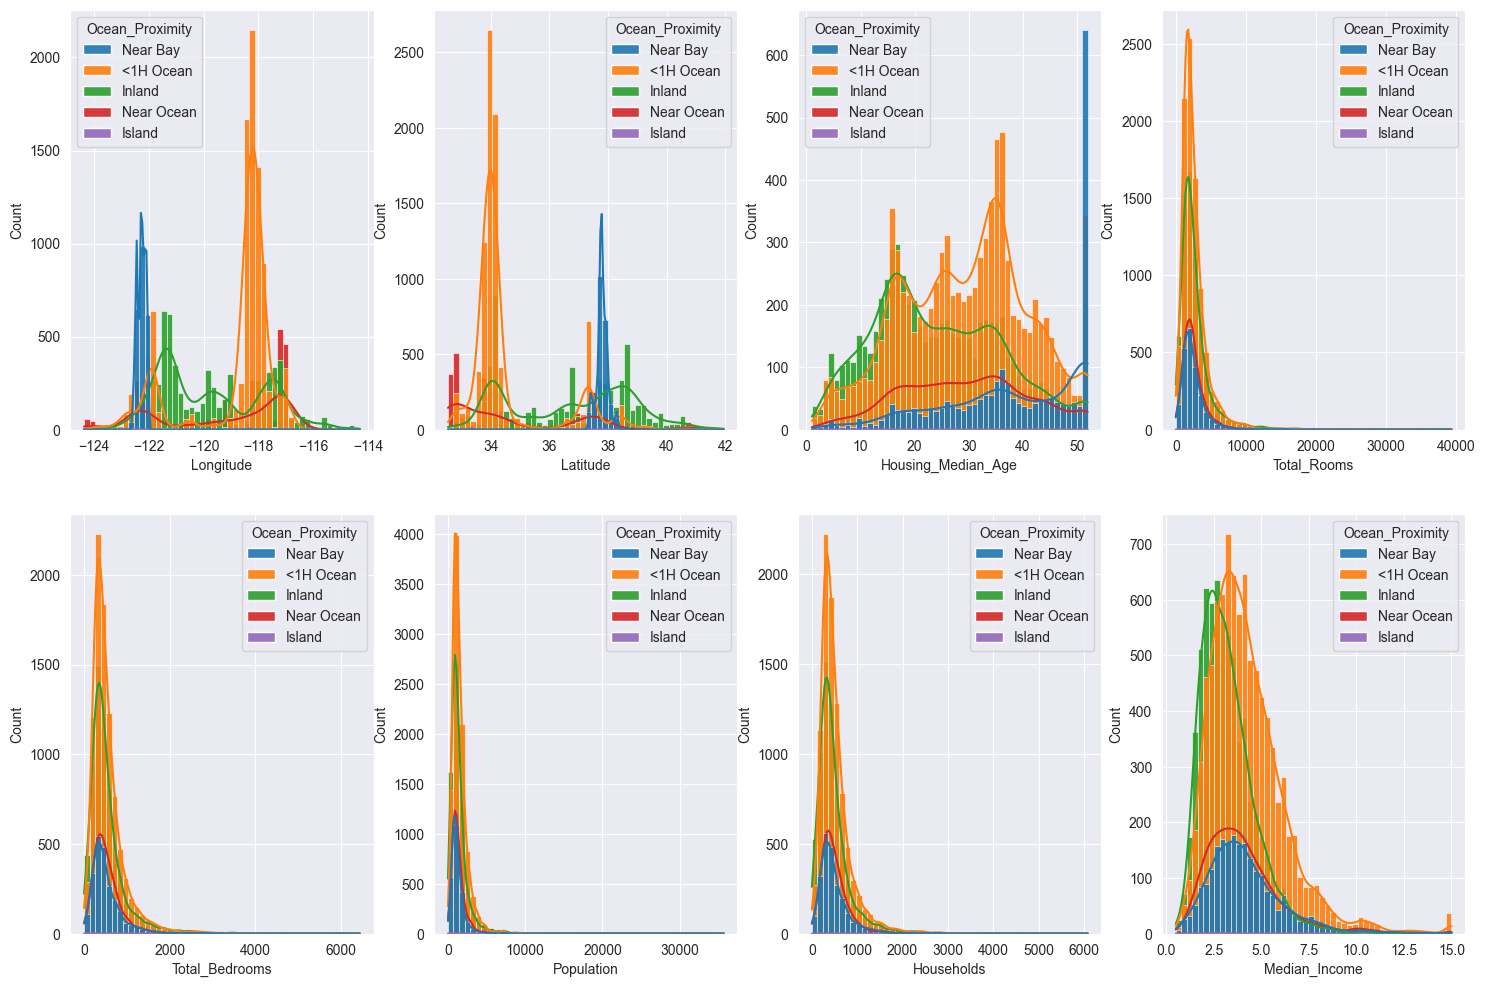

In [26]:
# sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'white'})

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18,12))
axes = axes.flat
for index, column in enumerate(data[feature_numcols]):
    sns.histplot(
        data=data2,
        x=column,
        kde=True,
        hue='Ocean_Proximity',
        bins=50,
        alpha=0.9,
        ax=axes[index]
)

### __Target distribution__

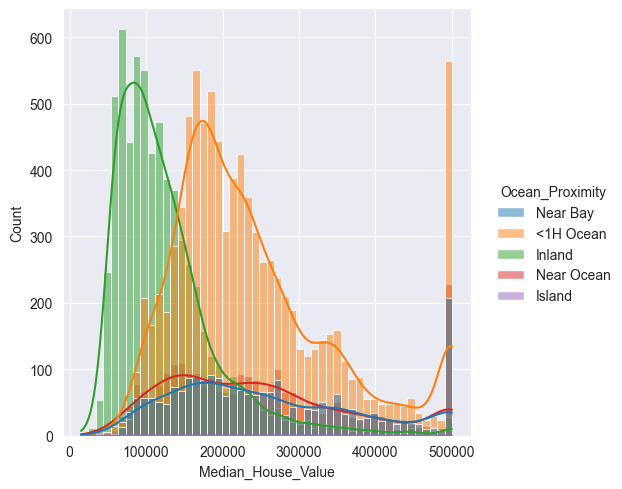

In [27]:
sns.displot(
    data=data,
    x='Median_House_Value',
    hue='Ocean_Proximity',
    kde='True',
    bins=50,
)

In [28]:
data2['Median_House_Value'].quantile(0.98)

500001.0

In [29]:
data3 = data2[data2['Median_House_Value']< data2['Median_House_Value'].quantile(0.99)]
data3

Longitude   Latitude  Housing_Median_Age  Total_Rooms  Total_Bedrooms  \
0     -122.230003  37.880001                41.0        880.0           129.0   
1     -122.220001  37.860001                21.0       7099.0          1106.0   
2     -122.239998  37.849998                52.0       1467.0           190.0   
3     -122.250000  37.849998                52.0       1274.0           235.0   
4     -122.250000  37.849998                52.0       1627.0           280.0   
...           ...        ...                 ...          ...             ...   
20635 -121.089996  39.480000                25.0       1665.0           374.0   
20636 -121.209999  39.490002                18.0        697.0           150.0   
20637 -121.220001  39.430000                17.0       2254.0           485.0   
20638 -121.320000  39.430000                18.0       1860.0           409.0   
20639 -121.239998  39.369999                16.0       2785.0           616.0   

       Population  Households  Median_Income Ocean_Proximity  \
0           322.0       126.0         8.3252        Near Bay   
1          2401.0      1138.0         8.3014        Near Bay   
2           496.0       177.0         7.2574        Near Bay   
3           558.0       219.0         5.6431        Near Bay   
4           565.0       259.0         3.8462        Near Bay   
...           ...         ...            ...             ...   
20635       845.0       330.0         1.5603          Inland   
20636       356.0       114.0         2.5568          Inland   
20637      1007.0       433.0         1.7000          Inland   
20638       741.0       349.0         1.8672          Inland   
20639      1387.0       530.0         2.3886          Inland   

       Median_House_Value  
0                452600.0  
1                358500.0  
2                352100.0  
3                341300.0  
4                342200.0  
...                   ...  
20635             78100.0  
20636             77100.0  
20637             92300.0  
20638             84700.0  
20639             89400.0  

[19675 rows x 10 columns]

In [30]:
column_outliers = ['Total_Rooms','Total_Bedrooms', 'Population', 
                   'Households', 'Median_Income']

skew = {}
log_skew = []
sqrt_skew = []
boxcox_skew = []
for column in column_outliers:
        skewness = data2[column].skew()
        skew[column] = skewness
        log_skew.append(np.log(data2[column]).skew())
        sqrt_skew.append(np.sqrt(data2[column]).skew())
    
skew_df = pd.DataFrame({
    'Column_Name' : skew.keys(),
    'Skew_Value'  : skew.values(),
    'Log_Skew'    : log_skew,
    'Sqrt_Skew'   : sqrt_skew,
})

skew_df

Column_Name  Skew_Value  Log_Skew  Sqrt_Skew
0     Total_Rooms    4.147343 -1.097339   1.355500
1  Total_Bedrooms    3.450401 -1.061739   1.201502
2      Population    4.935858 -1.070785   1.224655
3      Households    3.410438 -1.124359   1.126873
4   Median_Income    1.646657 -0.146082   0.689225

In [32]:
data4 = data3.copy(deep=True)
data4

Longitude   Latitude  Housing_Median_Age  Total_Rooms  Total_Bedrooms  \
0     -122.230003  37.880001                41.0        880.0           129.0   
1     -122.220001  37.860001                21.0       7099.0          1106.0   
2     -122.239998  37.849998                52.0       1467.0           190.0   
3     -122.250000  37.849998                52.0       1274.0           235.0   
4     -122.250000  37.849998                52.0       1627.0           280.0   
...           ...        ...                 ...          ...             ...   
20635 -121.089996  39.480000                25.0       1665.0           374.0   
20636 -121.209999  39.490002                18.0        697.0           150.0   
20637 -121.220001  39.430000                17.0       2254.0           485.0   
20638 -121.320000  39.430000                18.0       1860.0           409.0   
20639 -121.239998  39.369999                16.0       2785.0           616.0   

       Population  Households  Median_Income Ocean_Proximity  \
0           322.0       126.0         8.3252        Near Bay   
1          2401.0      1138.0         8.3014        Near Bay   
2           496.0       177.0         7.2574        Near Bay   
3           558.0       219.0         5.6431        Near Bay   
4           565.0       259.0         3.8462        Near Bay   
...           ...         ...            ...             ...   
20635       845.0       330.0         1.5603          Inland   
20636       356.0       114.0         2.5568          Inland   
20637      1007.0       433.0         1.7000          Inland   
20638       741.0       349.0         1.8672          Inland   
20639      1387.0       530.0         2.3886          Inland   

       Median_House_Value  
0                452600.0  
1                358500.0  
2                352100.0  
3                341300.0  
4                342200.0  
...                   ...  
20635             78100.0  
20636             77100.0  
20637             92300.0  
20638             84700.0  
20639             89400.0  

[19675 rows x 10 columns]

In [35]:
from sklearn.preprocessing import OrdinalEncoder

encode = OrdinalEncoder()

data4['Ocean_Proximity'] = encode.fit_transform(data4[['Ocean_Proximity']])
data4

Longitude   Latitude  Housing_Median_Age  Total_Rooms  Total_Bedrooms  \
0     -122.230003  37.880001                41.0        880.0           129.0   
1     -122.220001  37.860001                21.0       7099.0          1106.0   
2     -122.239998  37.849998                52.0       1467.0           190.0   
3     -122.250000  37.849998                52.0       1274.0           235.0   
4     -122.250000  37.849998                52.0       1627.0           280.0   
...           ...        ...                 ...          ...             ...   
20635 -121.089996  39.480000                25.0       1665.0           374.0   
20636 -121.209999  39.490002                18.0        697.0           150.0   
20637 -121.220001  39.430000                17.0       2254.0           485.0   
20638 -121.320000  39.430000                18.0       1860.0           409.0   
20639 -121.239998  39.369999                16.0       2785.0           616.0   

       Population  Households  Median_Income  Ocean_Proximity  \
0           322.0       126.0         8.3252              3.0   
1          2401.0      1138.0         8.3014              3.0   
2           496.0       177.0         7.2574              3.0   
3           558.0       219.0         5.6431              3.0   
4           565.0       259.0         3.8462              3.0   
...           ...         ...            ...              ...   
20635       845.0       330.0         1.5603              1.0   
20636       356.0       114.0         2.5568              1.0   
20637      1007.0       433.0         1.7000              1.0   
20638       741.0       349.0         1.8672              1.0   
20639      1387.0       530.0         2.3886              1.0   

       Median_House_Value  
0                452600.0  
1                358500.0  
2                352100.0  
3                341300.0  
4                342200.0  
...                   ...  
20635             78100.0  
20636             77100.0  
20637             92300.0  
20638             84700.0  
20639             89400.0  

[19675 rows x 10 columns]

<AxesSubplot: >

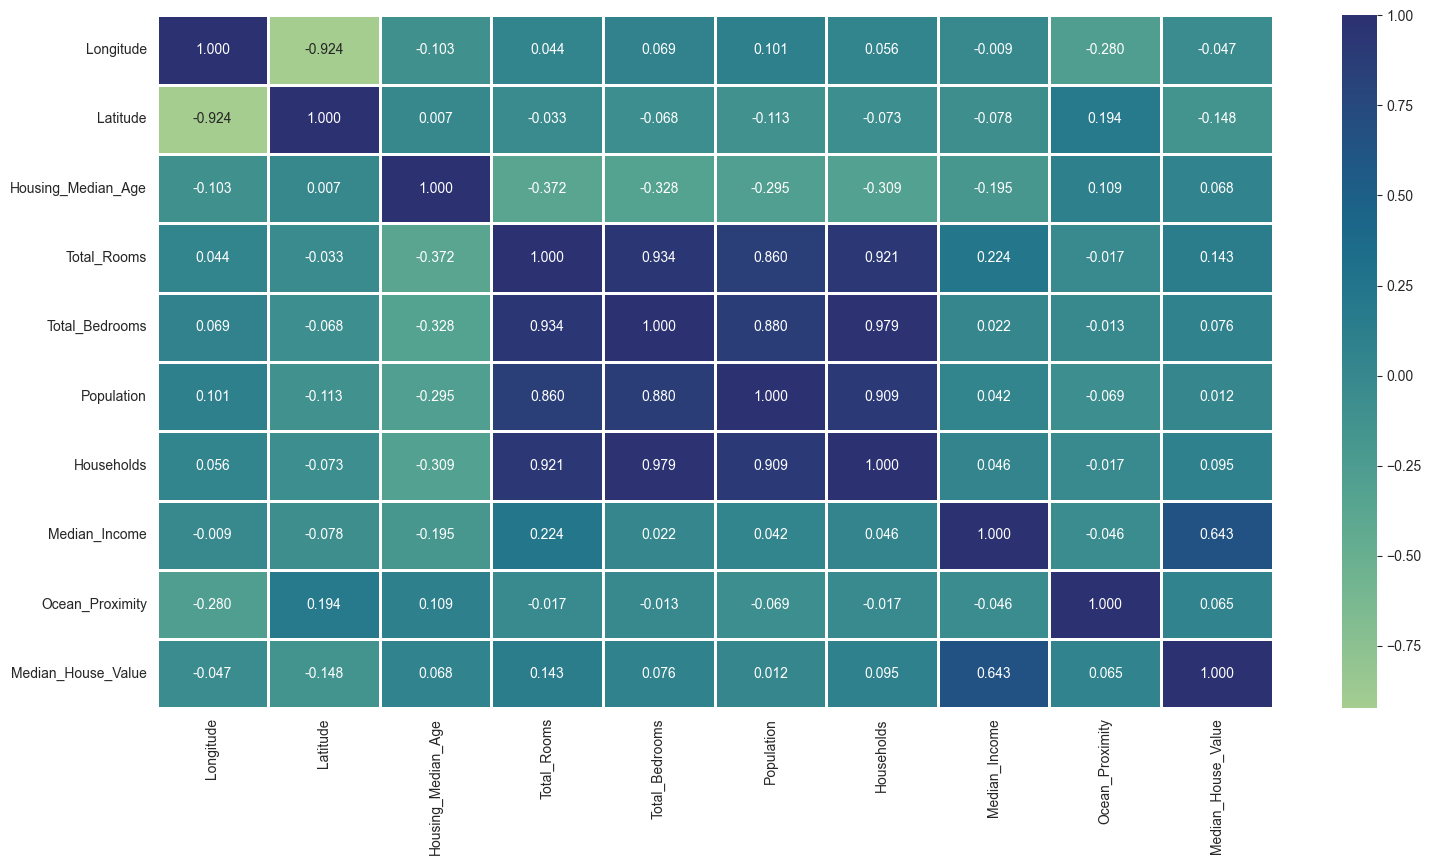

In [80]:
plt.figure(figsize=(18,9))
sns.heatmap(data4.corr(), annot=True, fmt='.3f', linewidths=2, cmap='crest')

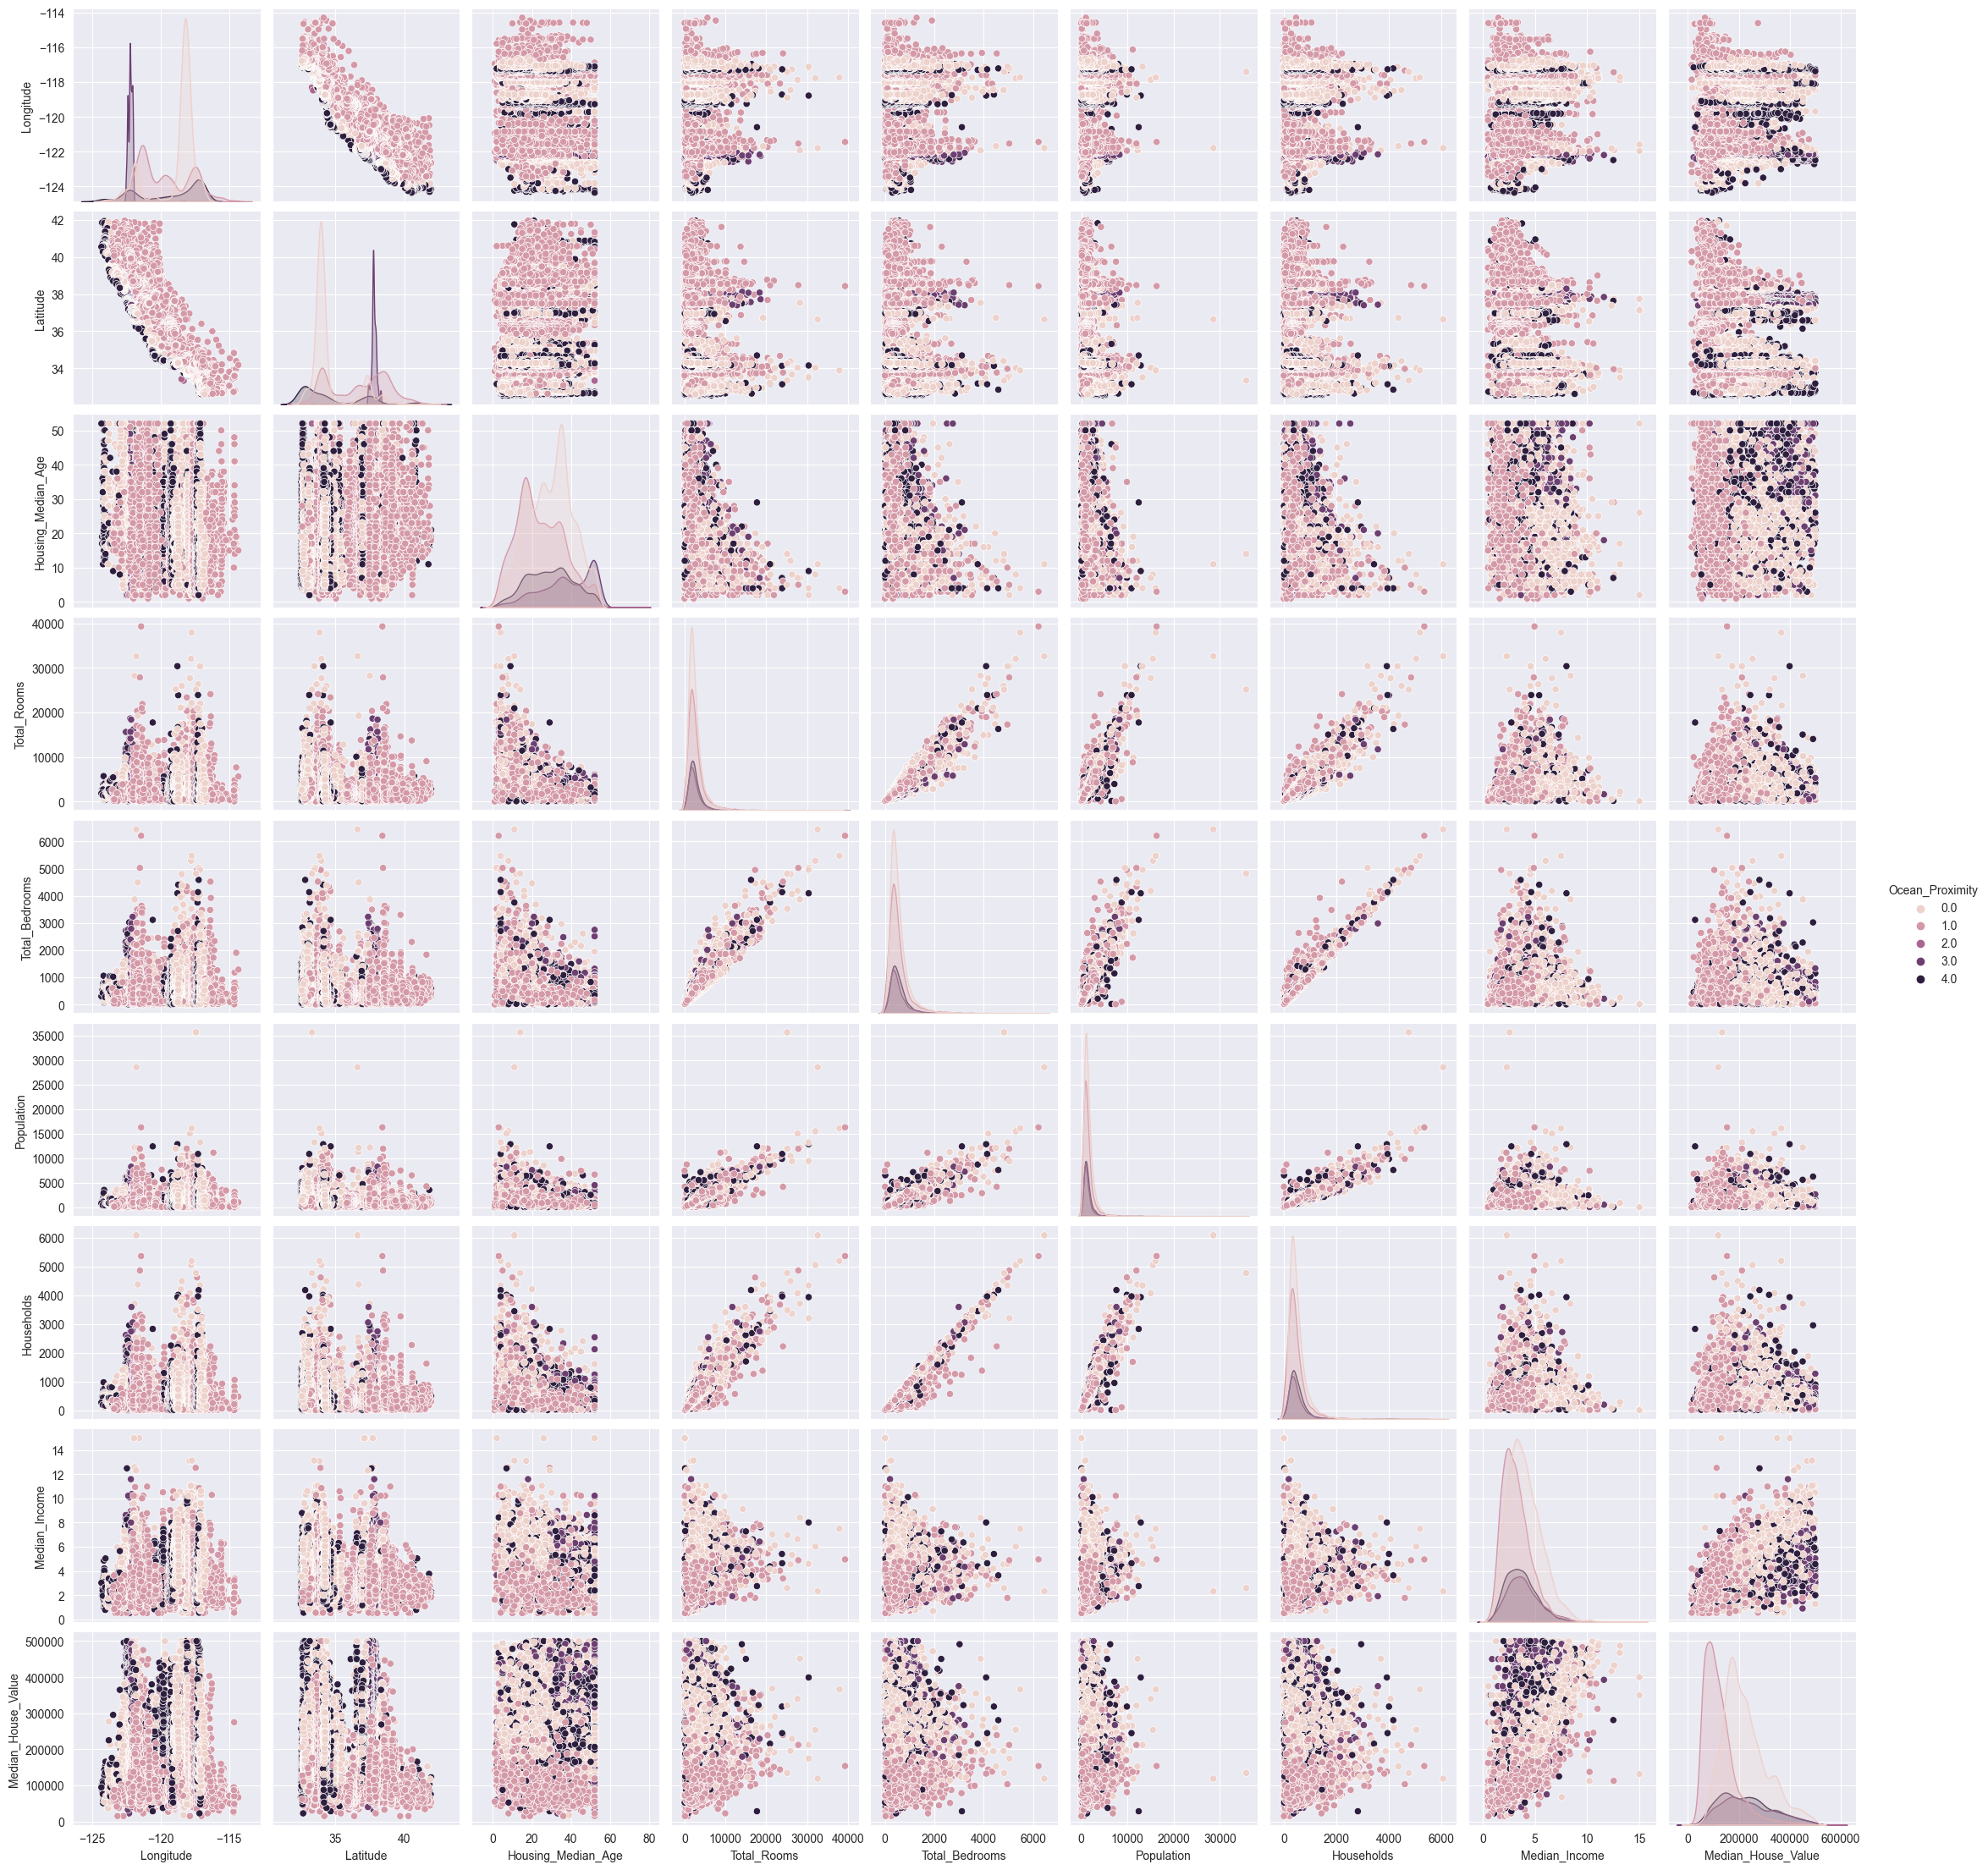

In [67]:
sns.pairplot(data=data4, hue='Ocean_Proximity')

In [53]:
x = data4.iloc[:, :-1].values
y = data4.iloc[:, -1].values

In [62]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

# __Training the model__

In [63]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = \
            train_test_split(x, y, 
                             test_size=0.10, 
                             random_state=2
                            )

In [ ]:
from sklearn.linear_model import LinearRegression

## __Handling Outliers__

In [ ]:
outliers_check = feature_numcols.drop('Longitude', 'latitude')

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flat

for index, column in enumerate(feature_numcols):
    sns.boxplot(
        data=data2,
        x=column,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]
    )
plt.tight_layout()

In [ ]:
px.box(
    data_frame=data2, 
    x='Ocean_Proximity', 
    y='Median_House_Value', 
    template='seaborn', 
    color='Ocean_Proximity'
)

In [ ]:
print('Before removing outliers using quantile data size is :', data2.size)

column_outliers = ['Total_Rooms',
                   'Total_Bedrooms', 'Population', 
                   'Households', 'Median_Income']

for column in column_outliers:
    data2 = data2[data2[column] < data2[column].quantile(0.97)]
    
    print(f'After removing outliers from {column} using quantile data size is : {data2.size}')

In [ ]:
# print('Before removing outliers using zscore data size is :', data2.size)

# # Define a function to remove outliers from the data using Z-Score method
# def outliers_remove_zscore():

#     # Create a filter for the data with all values set to True
#     filter_data= np.array([True] * len(data2))

#     # Loop over each column in the outliers_check list
#     for column in column_outliers:

#         # Compute the Z-Score for the current column
#         zscore = abs(stats.zscore(data2[column]))

#         # Update the filter_data array to include only data points with Z-Score less than 3
#         filter_data = (zscore < 3) & filter_data

#     # Return the updated filter_data array
#     return filter_data

# data3 = data2[outliers_remove_zscore()]

# print('After removing outliers using zscore data size is :', data3.size)

- The code defines a function `outliers_remove_zscore` that removes outliers from a given dataframe using the `Z-Score` method. 

The function does the following steps:

1. Initializes a Boolean array `filter_data` with the size equal to the number of rows in the `data` dataframe, and sets all values in the array to `True`.

2. Iterates over columns specified in the `outliers_check` list.

3. For each column, it calculates the Z-Score of the values in the column using the `stats.zscore` function from the scipy library.

4. It then updates the `filter_data` array by setting the values to `False` if the Z-Score of a value is greater than or equal to 3. The `&` operator is used to combine the new filter with the existing filter, effectively removing outliers from the data.

5. The function returns the `filter_data array`.

Finally, 

the code uses the `outliers_remove_zscore` function to filter the rows in the `data` dataframe, keeping only the rows where the `filter_data` values are `True`. This effectively removes the outliers from the data.

In [ ]:
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
# axes = axes.flat

# for index, column in enumerate(feature_numcols):
#     sns.boxplot(
#         data=data,
#         x=column,
#         ax=axes[index]
#     )
# plt.tight_layout()

In [ ]:
# sns.displot(
#     data=data,
#     x='Median_House_Value',
#     hue='Ocean_Proximity',
#     kde='True'
# )